### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [2]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)
The scikit-learn version is 0.24.2.


In [3]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [4]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [5]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns




In [6]:
# Load in the general demographics data.
df_general_dems = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')
# Load in the feature summary file.
df_feature_summary = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [7]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
df_general_dems.head(5)



,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [8]:
df_general_dems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [9]:
df_feature_summary.head(10)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [10]:
df_feature_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB




## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [11]:
# Identify missing or unknown data values and convert them to NaNs.
df_general_dems.isnull().sum().sum()


4896838

Looking at the data dictionary file I know that all the 'unknown values' are -1 and 0.  The df_feature_summary shows the column "missing or unknown" has extra values, like "9" but looking at the data dictionary, 9 is an assignment value of several different values depending on the column.  All 0's and -1's are unknown or missing.

In [12]:
for attribute, miss_index in zip(df_feature_summary['attribute'], df_feature_summary['missing_or_unknown']):
    missing_values = miss_index.strip('[]').split(',')
    missing_values = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in missing_values]
    if missing_values != ['']:
        df_general_dems[attribute] = df_general_dems[attribute].replace(missing_values, np.nan)

In [13]:
print('Total number of missing values after conversion is {}'.format(df_general_dems.isnull().sum().sum()))

Total number of missing values after conversion is 8373929


In [14]:
df_general_dems.head(15)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,4,NaN,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,1,1996.0,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,NaN,2.0,5,NaN,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,1,1979.0,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,NaN,1.0,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,NaN,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,6,1957.0,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,NaN,1.0,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,5,1963.0,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,NaN,2.0,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,NaN,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2,2.0,3,1,5,2,2,5,2,1943.0,1.0,0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,0.0,NaN,2.0,4,10.0,1.0,0.0,5.0,3.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,NaN,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2,5.0,1,5,1,5,4,3,4,NaN,12.0,0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,10.0,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1.0,0.0,NaN,1.0,4,NaN,1.0,0.0,6.0,NaN,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,1.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1,3.0,3,3,4,1,3,2,5,1964.0,9.0,0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0.0,0.0,NaN,1.0,1,14.0,1.0,0.0,4.0,NaN,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,NaN,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1,3.0,4,4,2,4,2,2,6,1974.0,3.0,1,3.0,10.0,3.0,1.0,1.0,10.0,5.0,1.0,11.0,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3.0,0.0,NaN,2.0,6,16.0,1.0,0.0,3.0,NaN,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,NaN,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2,4.0,2,4,2,3,5,4,1,1975.0,12.0,1,2.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3.0,0.0,NaN,2.0,4,17.0,1.0,0.0,4.0,6.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,NaN,2.0,6.

I can now see that all my missing values have been converted to NaN.

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

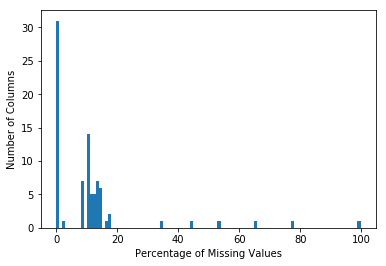

In [15]:
percent_missing_per_column = df_general_dems.isnull().sum() * 100 / len(df_general_dems)

plt.hist(percent_missing_per_column, bins=100)
plt.ylabel('Number of Columns')
plt.xlabel('Percentage of Missing Values')
plt.show()

In [16]:
above_30 = percent_missing_per_column[percent_missing_per_column > 30.00]

print(above_30) 

AGER_TYP        76.955435
GEBURTSJAHR     44.020282
TITEL_KZ        99.757636
ALTER_HH        34.813699
KK_KUNDENTYP    65.596749
KBA05_BAUMAX    53.468668
dtype: float64


There are six columns that major outliers that I will be removing.  They are:

 - AGER_TYP (Best-ager typology)
 - GEBURTSJAHR (Year of birth)
 - TITEL_KZ (Academic Title Flag - i.e. Dr. or Prof. title)
 - ALTER_HH (Birthdate of head of household)
 - KK_KUNDENTYP (Consumer pattern over past 12 months)
 - KBA05_BAUMAX (Most common building type within the microcell)             


In [17]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

df_general_dems = df_general_dems.drop(columns=['AGER_TYP', 'GEBURTSJAHR', 'ANZ_HH_TITEL', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'])
df_general_dems.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

I have removed the columns that include more than 30% missing data.  The columns removed are:

 - AGER_TYP (Best-ager typology)
 - GEBURTSJAHR (Year of birth)
 - TITEL_KZ (Academic Title Flag - i.e. Dr. or Prof. title)
 - ALTER_HH (Birthdate of head of household)
 - KK_KUNDENTYP (Consumer pattern over past 12 months)
 - KBA05_BAUMAX (Most common building type within the microcell)

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

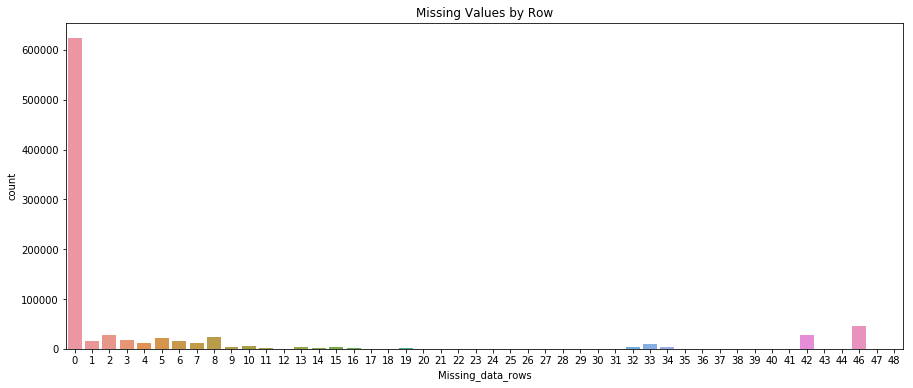

In [18]:
# How much data is missing in each row of the dataset?
df_general_dems['Missing_data_rows'] = df_general_dems.isna().sum(axis=1)

plt.figure(figsize=(15,6))
sns.countplot(x='Missing_data_rows', data=df_general_dems)
plt.title('Missing Values by Row')
plt.show()

What I can gather from this visual is that:
 
 - most (more than 600,000) of the rows have zero missing data.
 - the most missing data any row has is 46 cells.
 - the majority of missing data lies around 11 missing cells.
 
Based on this, I am going to split the data into missing data in 11 or less cells, and then the rest.

In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

threshold = 11

dataset_less = df_general_dems[df_general_dems['Missing_data_rows'] <= threshold]

dataset_more = df_general_dems[df_general_dems['Missing_data_rows'] > threshold]



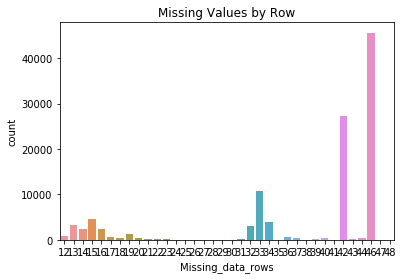

In [20]:
sns.countplot(x='Missing_data_rows', data=dataset_more)
plt.title('Missing Values by Row')
plt.show()

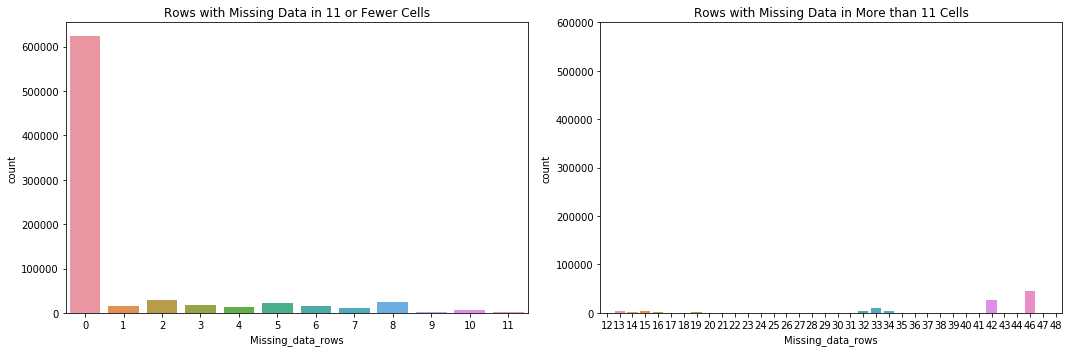

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Missing_data_rows', data=dataset_less, ax=axes[0])
axes[0].set_title('Rows with Missing Data in 11 or Fewer Cells')


sns.countplot(x='Missing_data_rows', data=dataset_more, ax=axes[1])
axes[1].set_title('Rows with Missing Data in More than 11 Cells')
axes[1].set_ylim(0, 600000)


plt.tight_layout()
plt.show()

I know the majority of rows have zero missing data.  So I'm reducing my yaxis to 60000 to see how that differs.

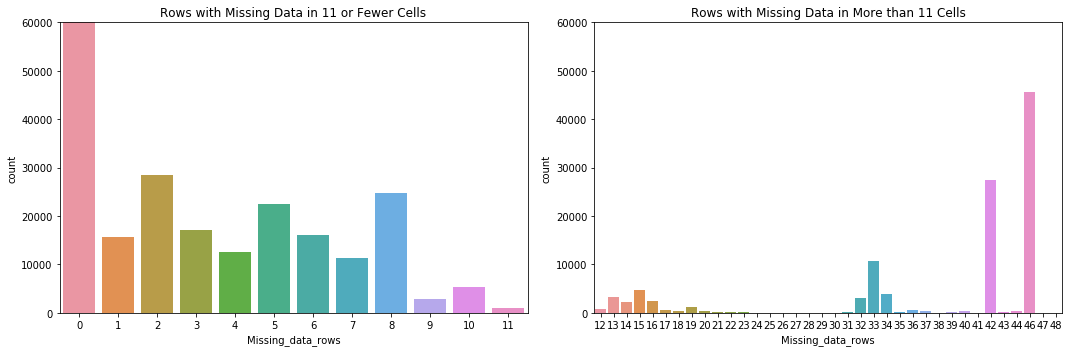

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Missing_data_rows', data=dataset_less, ax=axes[0])
axes[0].set_title('Rows with Missing Data in 11 or Fewer Cells')
axes[0].set_ylim(0, 60000)

sns.countplot(x='Missing_data_rows', data=dataset_more, ax=axes[1])
axes[1].set_title('Rows with Missing Data in More than 11 Cells')
axes[1].set_ylim(0, 60000)


plt.tight_layout()
plt.show()

#### Discussion 1.1.3: Assess Missing Data in Each Row


Comparing the distributions between these two graphs, as I am looking at rows that are missing 5 or fewer data points, this makes up the majority of the data. 

The data with a lot of missing values are qualitatively different from data with few or no missing values.  Visually, you can see the graph on the left is the majority of the data.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [23]:
df_feature_summary.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [24]:
# How many features are there of each data type?

df_feature_summary['type'].unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'],
      dtype=object)

There are 5 features of each data type:

 - categorical
 - ordinal
 - numeric
 - mixed
 - interval

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [25]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

type_categorical = df_feature_summary[df_feature_summary['type'] == 'categorical']

type_categorical

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


In [26]:
type_categorical['attribute'].unique()

array(['AGER_TYP', 'ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP',
       'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ',
       'VERS_TYP', 'ZABEOTYP', 'KK_KUNDENTYP', 'GEBAEUDETYP',
       'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015'], dtype=object)

I am using my data_less dataset, so I need to remember that I have removed some of these columns. If I call on them, I will get an error.  I will remove the following columns from my search:

 - AGER_TYP 
 - GEBURTSJAHR 
 - TITEL_KZ
 - KK_KUNDENTYP


In [27]:
dataset_less_categorical = dataset_less[['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']]

dataset_less_categorical.head(5)

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,5,W,8,8A
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0,5,W,4,4C
3,2,2.0,6,1.0,0,NaN,NaN,9.0,4.0,1.0,1.0,0.0,1.0,3,W,2,2A
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,2.0,0.0,2.0,4,W,6,6B
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,2.0,4,W,8,8C


In [28]:
dataset_less_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781343 entries, 1 to 891220
Data columns (total 17 columns):
ANREDE_KZ           781343 non-null int64
CJT_GESAMTTYP       777464 non-null float64
FINANZTYP           781343 non-null int64
GFK_URLAUBERTYP     777464 non-null float64
GREEN_AVANTGARDE    781343 non-null int64
LP_FAMILIE_FEIN     752076 non-null float64
LP_FAMILIE_GROB     752076 non-null float64
LP_STATUS_FEIN      777464 non-null float64
LP_STATUS_GROB      777464 non-null float64
NATIONALITAET_KZ    749178 non-null float64
SHOPPER_TYP         746534 non-null float64
SOHO_KZ             781343 non-null float64
VERS_TYP            746534 non-null float64
ZABEOTYP            781343 non-null int64
OST_WEST_KZ         781343 non-null object
CAMEO_DEUG_2015     777226 non-null object
CAMEO_DEU_2015      777226 non-null object
dtypes: float64(10), int64(4), object(3)
memory usage: 127.3+ MB


It looks like all the categorical columns are binary except:

 - OST_WEST_KZ (Building location via former East / West Germany (GDR / FRG))
 - CAMEO_DEUG_2015 (German CAMEO: Wealth / Life Stage Typology, rough scale)
 - CAMEO_DEU_2015 (German CAMEO: Wealth / Life Stage Typology, detailed scale)
 
 I will not need any of these columns in my set for my purposes.  These are neighborhood level attributes.  Focusing on person-level or household-level will be more meaningful.  Instead of re-encoding columns that I will not use I have decided to drop them from my analysis.




In [29]:
# Removing categorical variable(s) to be dropped from the analysis.

dataset_less = dataset_less.drop(columns=['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015'])

In [30]:
dataset_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781343 entries, 1 to 891220
Data columns (total 76 columns):
ALTERSKATEGORIE_GROB     778699 non-null float64
ANREDE_KZ                781343 non-null int64
CJT_GESAMTTYP            777464 non-null float64
FINANZ_MINIMALIST        781343 non-null int64
FINANZ_SPARER            781343 non-null int64
FINANZ_VORSORGER         781343 non-null int64
FINANZ_ANLEGER           781343 non-null int64
FINANZ_UNAUFFAELLIGER    781343 non-null int64
FINANZ_HAUSBAUER         781343 non-null int64
FINANZTYP                781343 non-null int64
GFK_URLAUBERTYP          777464 non-null float64
GREEN_AVANTGARDE         781343 non-null int64
HEALTH_TYP               746534 non-null float64
LP_LEBENSPHASE_FEIN      734260 non-null float64
LP_LEBENSPHASE_GROB      736945 non-null float64
LP_FAMILIE_FEIN          752076 non-null float64
LP_FAMILIE_GROB          752076 non-null float64
LP_STATUS_FEIN           777464 non-null float64
LP_STATUS_GROB           

I have successfully dropped the three unnecessary categorical columns and now have 76 columns in my new dataset.

In [31]:
# Removing additional variable(s) to be dropped from the analysis.

dataset_less = dataset_less.drop(columns=['CAMEO_INTL_2015'])


In [32]:
dataset_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781343 entries, 1 to 891220
Data columns (total 75 columns):
ALTERSKATEGORIE_GROB     778699 non-null float64
ANREDE_KZ                781343 non-null int64
CJT_GESAMTTYP            777464 non-null float64
FINANZ_MINIMALIST        781343 non-null int64
FINANZ_SPARER            781343 non-null int64
FINANZ_VORSORGER         781343 non-null int64
FINANZ_ANLEGER           781343 non-null int64
FINANZ_UNAUFFAELLIGER    781343 non-null int64
FINANZ_HAUSBAUER         781343 non-null int64
FINANZTYP                781343 non-null int64
GFK_URLAUBERTYP          777464 non-null float64
GREEN_AVANTGARDE         781343 non-null int64
HEALTH_TYP               746534 non-null float64
LP_LEBENSPHASE_FEIN      734260 non-null float64
LP_LEBENSPHASE_GROB      736945 non-null float64
LP_FAMILIE_FEIN          752076 non-null float64
LP_FAMILIE_GROB          752076 non-null float64
LP_STATUS_FEIN           777464 non-null float64
LP_STATUS_GROB           

#### Discussion 1.2.1: Re-Encode Categorical Features

All of my remaining columns in my "dataset_less" are binary except:

 - CAMEO_INTL_2015
 
I decided I will not need this in my set for my purposes. I have other columns that give this same information. Instead of re-encoding columns that I will not use, I have dropped these column from my analysis.  I now have 75 columns in my dataset.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [33]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
dataset_less_PRAEGENDE_JUGENDJAHRE = dataset_less[['PRAEGENDE_JUGENDJAHRE']]

dataset_less_PRAEGENDE_JUGENDJAHRE.head(5)


,PRAEGENDE_JUGENDJAHRE
1,14.0
2,15.0
3,8.0
4,8.0
5,3.0


In [34]:
#engineer new variable: Decade
# modified code found here https://stackoverflow.com/questions/47372274/apply-custom-function-over-multiple-columns-in-pandas

def DECADE(x):
    if x == 1:
        return 40
    elif x == 2:
        return 40
    elif x == 3:
        return 50
    elif x == 4:
        return 50
    elif x == 5:
        return 60
    elif x == 6:
        return 60
    elif x == 7:
        return 60
    elif x == 8:
        return 70
    elif x == 9:
        return 70
    elif x == 10:
        return 80
    elif x == 11:
        return 80
    elif x == 12:
        return 80
    elif x == 13:
        return 80
    elif x == 14:
        return 90
    elif x == 15:
        return 90

dataset_less['PRAEGENDE_JUGENDJAHRE_DECADE'] = dataset_less['PRAEGENDE_JUGENDJAHRE'].apply(DECADE)

dataset_less.head()
        

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Missing_data_rows,PRAEGENDE_JUGENDJAHRE_DECADE
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,8.0,1.0,1992.0,4.0,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,90.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,1.0,5.0,1992.0,2.0,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,90.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,1.0,4.0,1997.0,7.0,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,7,70.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,1.0,4.0,1992.0,3.0,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,0,70.0
5,1.0,2,2.0,3,1,5,2,2,5,2,1.0,0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,0.0,2.0,4,1.0,0.0,5.0,6.0,9.0,5.0,1.0,5.0,1992.0,7.0,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0,50.0


In [35]:
#engineer new variable: movement

def MOVEMENT(x):
    if x == 1:
        return 0
    elif x == 2:
        return 1
    elif x == 3:
        return 0
    elif x == 4:
        return 1
    elif x == 5:
        return 0
    elif x == 6:
        return 1
    elif x == 7:
        return 1
    elif x == 8:
        return 0
    elif x == 9:
        return 1
    elif x == 10:
        return 0
    elif x == 11:
        return 1
    elif x == 12:
        return 0
    elif x == 13:
        return 1
    elif x == 14:
        return 0
    elif x == 15:
        return 1
   

dataset_less['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = dataset_less['PRAEGENDE_JUGENDJAHRE'].apply(MOVEMENT)

dataset_less.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Missing_data_rows,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,8.0,1.0,1992.0,4.0,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,90.0,0.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,1.0,5.0,1992.0,2.0,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,90.0,1.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,1.0,4.0,1997.0,7.0,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,7,70.0,0.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,1.0,4.0,1992.0,3.0,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,0,70.0,0.0
5,1.0,2,2.0,3,1,5,2,2,5,2,1.0,0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,0.0,2.0,4,1.0,0.0,5.0,6.0,9.0,5.0,1.0,5.0,1992.0,7.0,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0,50.0,0.0


Let's take a look at just our original column and two new ones side by side.

In [36]:
dataset_less_New_Columns = dataset_less[['PRAEGENDE_JUGENDJAHRE', 'PRAEGENDE_JUGENDJAHRE_DECADE', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT']]

dataset_less_New_Columns.head(25)

,PRAEGENDE_JUGENDJAHRE,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT
1,14.0,90.0,0.0
2,15.0,90.0,1.0
3,8.0,70.0,0.0
4,8.0,70.0,0.0
5,3.0,50.0,0.0
6,10.0,80.0,0.0
7,8.0,70.0,0.0
8,11.0,80.0,1.0
9,15.0,90.0,1.0
10,3.0,50.0,0.0


# Investigate "CAMEO_INTL_2015" and engineer two new variables.

CAMEO_INTL_2015 has been removed from my dataset as the information was redundant. I can get the same information from other columns, such as:

- LP_FAMILIE_FEIN (Family type, fine scale)

#### Discussion 1.2.2: Engineer Mixed-Type Features

Honestly, I could have dropped both columns as neither are pertinent to my analysis.  There are many other columns of data that I would use over these two.

However, for this project I kept the 'PRAEGENDE_JUGENDJAHRE' column and created two new columns from it's data.  One representing the decade and the other the movement.

I dropped CAMEO_INTL_2015 from my dataset as the information is redundant. I can get this same information from other columns such as:

 - HH_EINKOMMEN_SCORE (Estimated household net income)
 - LP_FAMILIE_FEIN (Family type, fine scale)

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

I feel as I have too many columns in my dataset for my purposes.  I need to scale down to what is necessary for my analysis.  I am trying to identify those who are most likely to purchase the products for a mailing campaign.  I have so much data here, but I need to focus on what is truly helpful.

I am going to keep:

 - ALTERSKATEGORIE_GROB (Estimated age based on given name analysis): knowing the age range is important.
 - ANREDE_KZ (Gender): this will be important if they want to target specific genders for specific products.
 - CJT_GESAMTTYP (Customer-Journey-Typology: preferred information and buying channels for consumer): this column is very important as it details how they like to shop.
 - FINANZ_MINIMALIST: the following "FINANZ" columns are important as they combine to help understand what kind of spender/saver the individual is.
 - FINANZ_SPARER 
 - FINANZ_VORSORGER              
 - FINANZ_ANLEGER                
 - FINANZ_UNAUFFAELLIGER         
 - FINANZ_HAUSBAUER              
 - FINANZTYP  
 - GFK_URLAUBERTYP (Vacacation habits): this will be helpful for certain mailings.
 - LP_LEBENSPHASE_FEIN (Life stage, fine scale): very important column, data includes income level and age level details.
 - LP_FAMILIE_FEIN (Family type, fine scale): this is a very nice quick glance type column of the family type. Nice for the ability to target families with kids, or specifically teenagers.
 - RETOURTYP_BK_S (Return type): this column describes their return habits.
 - All "SEMIO_" columns: these columns describe their personality typologies.  All very important.
 - ZABEOTYP (Energy consumption typology): will be important for certain targeted mailings.
 - ANZ_PERSONEN (Number of adults in household): important column!  More adults in the house means more shoppers.
 - HH_EINKOMMEN_SCORE (Estimated household net income): very important column.
 - WOHNDAUER_2008 (Length of residence): longer a consumer has stayed in their house the more likely they have higher credit.
 - GEBAEUDETYP (Type of building (residential vs. commercial)): this is the only building level data I am keeping.  This is helpful to know when targeting residential vs commerical buildings.
 - BALLRAUM (Distance to nearest urban center): how far are they from shopping abilities.
 - INNENSTADT (Distance to city center (downtown)): imporatant info.
 
 
I am going to drop:
 - ANZ_TITEL (Number of professional academic title holders in household): irrelevant information to mailers.
 - SOHO_KZ (Small office / home office flag): not very helpful information
 - SHOPPER_TYP: (Shopper typology): not very helpful with the values listed.
 - GREEN_AVANTGARDE (Membership in environmental sustainability as part of youth): not very helpful      
 - HEALTH_TYP (Health typology): it's not a very informative column.
 - LP_LEBENSPHASE_GROB (Life stage, rough scale): it's redundant, a summary of the "LP_LEBENSPHASE_FEIN" column I am keeping.
 - LP_FAMILIE_GROB (Family type, rough scale): redundant.
 - LP_STATUS_FEIN (Social status, fine scale): other columns more helpful.
 - LP_STATUS_GROB (Social status, rough scale): redundant.
 - NATIONALITAET_KZ (Nationality based on given name analysis): this is assumptive, not factual.
 - PRAEGENDE_JUGENDJAHRE (Dominating movement of person's youth): this column has been broken down and no longer needed.
 - VERS_TYP (Insurance Type): not very helpful for analysis.
 - W_KEIT_KIND_HH (Likelihood of children in household): redundant.
 - Building Level data: ANZ_HAUSHALTE_AKTIV, KONSUMNAEHE, MIN_GEBAEUDEJAHR, WOHNLAGE: not necessary data as I already have individual data that I will focus on.
 - KBA05_ANTG1, KBA05_ANTG2, KBA05_ANTG3, KBA05_ANTG4: not helpful info. 
 - PLZ8_ANTG1, PLZ8_ANTG2, PLZ8_ANTG3, PLZ8_ANTG4, PLZ8_BAUMAX: not helpful info.              ,                  
 - KBA05_GBZ (Number of buildings in the microcell): not helpful info.
 - EWDICHTE (Density of households per square kilometer): redundant.
 - Region features: GEBAEUDETYP_RASTER, KKK, MOBI_REGIO, ONLINE_AFFINITAET, REGIOTYP, KBA13_ANZAHL_PKW, PLZ8_HHZ, PLZ8_GBZ, ARBEIT, ORTSGR_KLS9, RELAT_AB: these columns are either redundant or do not hold very helpful data.
 

In [37]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
dataset_less = dataset_less.drop(columns=['ANZ_TITEL', 'SOHO_KZ', 'SHOPPER_TYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'VERS_TYP', 'W_KEIT_KIND_HH', 'PRAEGENDE_JUGENDJAHRE', 'ANZ_HAUSHALTE_AKTIV', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'KBA05_GBZ', 'EWDICHTE', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB'])

dataset_less.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 781343 entries, 1 to 891220
Data columns (total 38 columns):
ALTERSKATEGORIE_GROB              778699 non-null float64
ANREDE_KZ                         781343 non-null int64
CJT_GESAMTTYP                     777464 non-null float64
FINANZ_MINIMALIST                 781343 non-null int64
FINANZ_SPARER                     781343 non-null int64
FINANZ_VORSORGER                  781343 non-null int64
FINANZ_ANLEGER                    781343 non-null int64
FINANZ_UNAUFFAELLIGER             781343 non-null int64
FINANZ_HAUSBAUER                  781343 non-null int64
FINANZTYP                         781343 non-null int64
GFK_URLAUBERTYP                   777464 non-null float64
LP_LEBENSPHASE_FEIN               734260 non-null float64
LP_FAMILIE_FEIN                   752076 non-null float64
RETOURTYP_BK_S                    777464 non-null float64
SEMIO_SOZ                         781343 non-null int64
SEMIO_FAM                         781

I am going to also remove the two columns I created as the information in both is either redundant (decade they were born in) or unneccesary (movement).  These two columns were essential to the project, but not to my analysis.

In [38]:
dataset_less = dataset_less.drop(columns=['PRAEGENDE_JUGENDJAHRE_DECADE', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT'])

dataset_less.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 781343 entries, 1 to 891220
Data columns (total 36 columns):
ALTERSKATEGORIE_GROB     778699 non-null float64
ANREDE_KZ                781343 non-null int64
CJT_GESAMTTYP            777464 non-null float64
FINANZ_MINIMALIST        781343 non-null int64
FINANZ_SPARER            781343 non-null int64
FINANZ_VORSORGER         781343 non-null int64
FINANZ_ANLEGER           781343 non-null int64
FINANZ_UNAUFFAELLIGER    781343 non-null int64
FINANZ_HAUSBAUER         781343 non-null int64
FINANZTYP                781343 non-null int64
GFK_URLAUBERTYP          777464 non-null float64
LP_LEBENSPHASE_FEIN      734260 non-null float64
LP_FAMILIE_FEIN          752076 non-null float64
RETOURTYP_BK_S           777464 non-null float64
SEMIO_SOZ                781343 non-null int64
SEMIO_FAM                781343 non-null int64
SEMIO_REL                781343 non-null int64
SEMIO_MAT                781343 non-null int64
SEMIO_VERT               781343

There are now 36 columns in my dataset I will be using for the rest of the project.  

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [39]:
# Load in the customer demographics data. ### delete this  when works
df_customer_dems = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

df_customer_dems.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,2,0,4.0,1,1,20.0,5.0,2.0,2.0,10.0,5.0,1,4,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,3,0.0,0.0,1,3,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,2,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,3,0.0,0.0,1,3,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,2,0,3.0,1,2,13.0,3.0,1.0,1.0,10.0,5.0,1,4,5.0,2,2,1,3,3,7,7,1,2,7,5,6,4,1,1,0.0,0.0,2,3,6.0,1.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,8.0,1.0,1992.0,W,2.0,5,5D,34,2.0,2.0,0.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,6,0,10.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,1,3.0,6,5,3,4,7,5,3,4,3,3,3,3,3,4,0,0.0,0.0,1,1,8.0,0.0,0.0,4.0,NaN,NaN,9.0,0.0,NaN,2.0,2.0,1992.0,W,7.0,4,4C,24,3.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,2,1960,2.0,0,3,31.0,10.0,10.0,5.0,1.0,1.0,1,8,5.0,4,5,4,6,5,6,4,5,5,3,5,2,5,4,1,0.0,0.0,2,1,20.0,4.0,0.0,6.0,2.0,2.0,9.0,7.0,0.0,3.0,1.0,1992.0,W,3.0,7,7B,41,0.0,3.0,2.0,0.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


<b>Please Note: </b> I have tried so hard to get this function to run without crashing and I cannot.  This is my cleaning function.  However when I seperate them all out, each works in seconds.  
    

This is my cleaning function:

def clean_data1(df):

    #Remove all NaN values
    for attribute, miss_index in zip(df_feature_summary['attribute'], df_feature_summary['missing_or_unknown']):
        missing_values = miss_index.strip('[]').split(',')
        missing_values = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in missing_values]
        
        if missing_values != ['']:
            df[attribute] = df[attribute].replace(missing_values, np.nan)
            
    #drop first set of columns        
    df=df.drop(columns=['AGER_TYP', 'GEBURTSJAHR', 'ANZ_HH_TITEL', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'])

    #find threshold
    df['Missing_data_rows'] = df.isna().sum(axis=1)

    threshold = 11

    cust_dataset_less = df[df['Missing_data_rows'] <= threshold]

       
    #drop next set of columns
    cust_dataset_less=cust_dataset_less.drop(columns=['GREEN_AVANTGARDE', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015', 'ANZ_TITEL', 'SOHO_KZ', 'SHOPPER_TYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'VERS_TYP', 'W_KEIT_KIND_HH', 'PRAEGENDE_JUGENDJAHRE', 'ANZ_HAUSHALTE_AKTIV', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'KBA05_GBZ', 'EWDICHTE', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB'])
    
    #rename new dataset
    clean_cust_dems = cust_dataset_less

    #drop remaining null values
    clean_cust_dems.dropna(inplace=True)
      
    return df
    

In [40]:
 #Remove all NaN values
for attribute, miss_index in zip(df_feature_summary['attribute'], df_feature_summary['missing_or_unknown']):
    missing_values = miss_index.strip('[]').split(',')
    missing_values = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in missing_values]
        
    if missing_values != ['']:
        df_customer_dems[attribute] = df_customer_dems[attribute].replace(missing_values, np.nan)

In [42]:
#drop first set of columns        
df_customer_dems=df_customer_dems.drop(columns=['AGER_TYP', 'GEBURTSJAHR', 'ANZ_HH_TITEL', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'])

In [43]:
#find threshold
df_customer_dems['Missing_data_rows'] = df_customer_dems.isna().sum(axis=1)

threshold = 11

cust_dataset_less = df_customer_dems[df_customer_dems['Missing_data_rows'] <= threshold]


In [44]:
#drop next set of columns
cust_dataset_less=cust_dataset_less.drop(columns=['GREEN_AVANTGARDE', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015', 'ANZ_TITEL', 'SOHO_KZ', 'SHOPPER_TYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'VERS_TYP', 'W_KEIT_KIND_HH', 'PRAEGENDE_JUGENDJAHRE', 'ANZ_HAUSHALTE_AKTIV', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'KBA05_GBZ', 'EWDICHTE', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB'])

In [45]:
#rename new dataset
clean_cust_dems = cust_dataset_less

#drop remaining null values
clean_cust_dems.dropna(inplace=True)
    


In [46]:
clean_cust_dems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129870 entries, 0 to 191651
Data columns (total 36 columns):
ALTERSKATEGORIE_GROB     129870 non-null float64
ANREDE_KZ                129870 non-null int64
CJT_GESAMTTYP            129870 non-null float64
FINANZ_MINIMALIST        129870 non-null int64
FINANZ_SPARER            129870 non-null int64
FINANZ_VORSORGER         129870 non-null int64
FINANZ_ANLEGER           129870 non-null int64
FINANZ_UNAUFFAELLIGER    129870 non-null int64
FINANZ_HAUSBAUER         129870 non-null int64
FINANZTYP                129870 non-null int64
GFK_URLAUBERTYP          129870 non-null float64
LP_LEBENSPHASE_FEIN      129870 non-null float64
LP_FAMILIE_FEIN          129870 non-null float64
RETOURTYP_BK_S           129870 non-null float64
SEMIO_SOZ                129870 non-null int64
SEMIO_FAM                129870 non-null int64
SEMIO_REL                129870 non-null int64
SEMIO_MAT                129870 non-null int64
SEMIO_VERT               129870

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [47]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now. I do not have a lot of missing data anymore, so I will drop any rows with missing data.
#I am going to rename my general dataset
clean_general_data = dataset_less

clean_general_data.dropna(inplace=True)


In [48]:
clean_general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732147 entries, 1 to 891220
Data columns (total 36 columns):
ALTERSKATEGORIE_GROB     732147 non-null float64
ANREDE_KZ                732147 non-null int64
CJT_GESAMTTYP            732147 non-null float64
FINANZ_MINIMALIST        732147 non-null int64
FINANZ_SPARER            732147 non-null int64
FINANZ_VORSORGER         732147 non-null int64
FINANZ_ANLEGER           732147 non-null int64
FINANZ_UNAUFFAELLIGER    732147 non-null int64
FINANZ_HAUSBAUER         732147 non-null int64
FINANZTYP                732147 non-null int64
GFK_URLAUBERTYP          732147 non-null float64
LP_LEBENSPHASE_FEIN      732147 non-null float64
LP_FAMILIE_FEIN          732147 non-null float64
RETOURTYP_BK_S           732147 non-null float64
SEMIO_SOZ                732147 non-null int64
SEMIO_FAM                732147 non-null int64
SEMIO_REL                732147 non-null int64
SEMIO_MAT                732147 non-null int64
SEMIO_VERT               732147

Removing all rows with any missing data brought me from 781,343 entries to 732,147.  It removed 49,196 rows, or 6.3% of my data.  I still have sufficient amount of data to work with that is now all clean and complete.

In [49]:
# Apply feature scaling to the general population demographics data.

from sklearn.preprocessing import StandardScaler

data = clean_general_data

scaler = StandardScaler()

clean_general_data_scaled_array = scaler.fit_transform(data)

clean_general_data_scaled = pd.DataFrame(clean_general_data_scaled_array, columns=data.columns)

clean_general_data_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,LP_LEBENSPHASE_FEIN,LP_FAMILIE_FEIN,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ZABEOTYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,WOHNDAUER_2008,GEBAEUDETYP,BALLRAUM,INNENSTADT,Missing_data_rows
0,-1.739581,0.967543,0.995461,-1.537464,1.591792,-1.047008,1.515401,1.013664,1.360474,-1.388269,0.717659,0.384875,0.267637,-1.662217,0.422228,-0.049332,0.038001,-0.44910,-1.719420,-1.101164,-1.433858,-0.580136,1.283414,-0.302846,1.321704,-0.148546,1.533386,1.264763,1.146562,0.181222,1.022067,0.550951,1.948394,0.841642,1.697925,-0.342962
1,0.206235,0.967543,-0.312715,-1.537464,0.909154,-1.769293,-0.549077,0.289695,1.360474,-1.388269,0.717659,-1.083917,-0.744872,-0.285119,-0.091126,-1.612861,-0.494129,-0.44910,-0.155702,-0.147510,0.767222,-0.580136,0.076892,1.404272,1.321704,1.448570,-0.619986,-0.426292,1.146562,-0.701848,-0.270252,0.550951,-0.676240,-0.990454,-0.274023,-0.342962
2,0.206235,-1.033546,0.995461,0.665219,0.226516,0.397563,-1.237236,0.289695,-0.791322,0.541221,-0.688823,1.282471,1.533273,1.091978,0.935581,-0.049332,0.038001,-0.96707,1.408015,-0.147510,-0.333318,0.941425,-1.129629,-0.871886,-1.394496,-1.213290,-0.081643,-0.989977,0.439353,1.947362,0.375907,0.550951,-0.676240,-0.990454,-1.752983,-0.342962
3,-1.739581,0.967543,-0.966803,-0.069009,-1.138760,1.119848,-0.549077,-0.434273,1.360474,-0.905896,-1.814008,-0.675919,-0.744872,-0.285119,-1.117833,-0.049332,1.634391,0.06887,-1.198181,-1.101164,-1.433858,0.434238,1.886674,-0.302846,-0.308016,-0.148546,1.533386,1.264763,0.439353,-0.701848,0.375907,0.550951,-0.676240,0.841642,1.204938,-0.342962
4,-0.766673,0.967543,0.995461,-1.537464,1.591792,-1.769293,1.515401,1.013664,-0.074056,0.058849,1.280252,-1.165517,-0.744872,0.403429,-1.117833,0.471844,0.570131,1.62278,-1.198181,0.806144,0.216952,0.434238,1.886674,1.404272,-0.308016,1.448570,1.533386,1.828449,0.439353,-0.701848,1.022067,0.550951,-0.676240,0.841642,-0.767010,-0.342962


### Discussion 2.1: Apply Feature Scaling

As discussed above, I decided to remove any rows with missing values.  With this large of a dataset, removing the missing values seemed more efficient and I still have a lot of data to work with.  I used a StandardScaler as suggested.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [50]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(clean_general_data_scaled)

cgds_pca = pca.transform(clean_general_data_scaled)


In [51]:
cgds_pca

array([[ 4.02389879, -3.25426928,  0.79916285, ..., -0.23620788,
        -0.07436163,  0.39959582],
       [-0.29649708, -3.56892546, -1.47551659, ..., -0.0414561 ,
        -0.04880822, -0.08075248],
       [-0.45905578,  3.50055741,  0.86438427, ..., -0.41245205,
        -0.38955958, -0.11396729],
       ...,
       [ 0.23892166,  0.2474102 , -2.07821631, ..., -0.45387767,
         1.101783  , -0.15022544],
       [ 5.37484666,  1.53049398, -0.89821051, ..., -0.30536699,
         0.08329989,  0.22259117],
       [-0.7615268 ,  2.77549033, -2.46220691, ..., -0.41612957,
        -0.42206195, -0.21144888]])

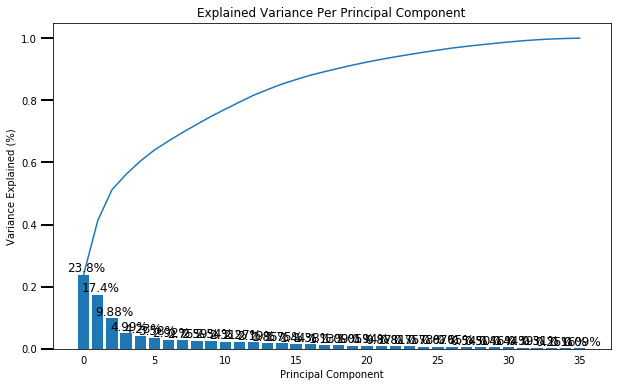

In [52]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

Based on the graph, I can see that at 5 components, over half of the variance of my data is explained.  I want a little bit more, so I will use 10 components, which will put me right about at 80% of variance explained. 

In [53]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(10)
pca.fit(clean_general_data_scaled)

cgds_pca = pca.transform(clean_general_data_scaled)

cgds_pca

array([[ 4.0238988 , -3.25426933,  0.79916103, ..., -0.24537068,
         0.8998445 ,  1.09185337],
       [-0.29649712, -3.56892545, -1.47552171, ..., -0.3568597 ,
        -0.50741701, -0.6408994 ],
       [-0.45905575,  3.50055756,  0.86438763, ..., -0.23358593,
        -0.3404066 , -1.8255437 ],
       ...,
       [ 0.23892168,  0.24741028, -2.0782095 , ...,  1.46579482,
         3.42550396, -1.20714128],
       [ 5.37484663,  1.53049403, -0.89821694, ...,  0.53393568,
         0.98755487,  0.75127323],
       [-0.7615268 ,  2.77549026, -2.46220551, ...,  0.69276564,
        -0.28745671,  3.15289629]])

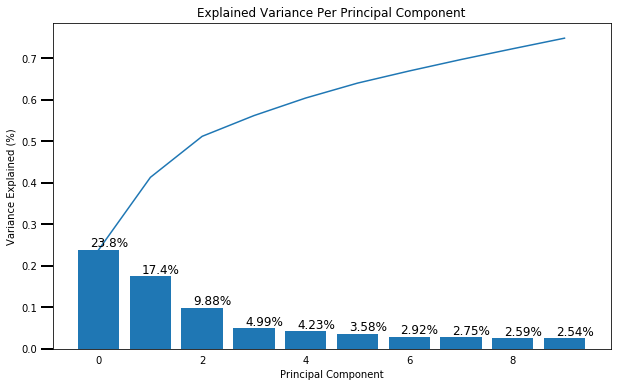

In [54]:
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction

I am going to retain 10 principal components for the next step of analysis.  These 10 components make up roughly 80% of total amount of variability in my data.


### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [55]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

#function code help from various sources: https://www.google.com/search?q=+Map+weights+for+the+first+principal+component+to+corresponding+feature+names+in+pandas&sca_esv=bf172ea85903387e&source=hp&ei=bgIxZ6WBEejJp84P7I-GkQE&iflsig=AL9hbdgAAAAAZzEQfszCUJ8RdjgWDwPPg8CDAewx42Z7&ved=0ahUKEwil8NyaudKJAxXo5MkDHeyHIRIQ4dUDCBg&uact=5&oq=+Map+weights+for+the+first+principal+component+to+corresponding+feature+names+in+pandas&gs_lp=Egdnd3Mtd2l6IlcgTWFwIHdlaWdodHMgZm9yIHRoZSBmaXJzdCBwcmluY2lwYWwgY29tcG9uZW50IHRvIGNvcnJlc3BvbmRpbmcgZmVhdHVyZSBuYW1lcyBpbiBwYW5kYXMyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAuGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwEyEBAAGAMY5QIY6gIYjAMYjwFIiR5QxwNY9BxwAXgAkAEAmAEAoAEAqgEAuAEDyAEA-AEC-AEBmAIBoAIDqAIKmAMDkgcBMaAHAA&sclient=gws-wiz and https://stackoverflow.com/questions/49993837/plotting-feature-weight-for-pca-analysis
def weights_to_principal_component(pca, component):
    
    weights = pca.components_[component]
    
    weights_df = pd.DataFrame({'Component': clean_general_data_scaled.columns, 'Weight':weights})   
    
    sorted_weights = weights_df.sort_values(by='Weight', ascending=False)
    
    return sorted_weights

In [56]:
weights_to_principal_component(pca, 0)

,Component,Weight
16,SEMIO_REL,0.291361
4,FINANZ_SPARER,0.282941
26,SEMIO_PFLICHT,0.266787
27,SEMIO_TRADV,0.258760
7,FINANZ_UNAUFFAELLIGER,0.239445
21,SEMIO_KULT,0.234086
6,FINANZ_ANLEGER,0.209648
15,SEMIO_FAM,0.205605
22,SEMIO_RAT,0.204067
17,SEMIO_MAT,0.188942


In [57]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

weights_to_principal_component(pca, 1)

,Component,Weight
18,SEMIO_VERT,0.348123
14,SEMIO_SOZ,0.245714
15,SEMIO_FAM,0.237917
21,SEMIO_KULT,0.233535
3,FINANZ_MINIMALIST,0.217489
9,FINANZTYP,0.117339
5,FINANZ_VORSORGER,0.088775
11,LP_LEBENSPHASE_FEIN,0.085638
13,RETOURTYP_BK_S,0.084629
16,SEMIO_REL,0.077392


In [58]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

weights_to_principal_component(pca, 2)

,Component,Weight
11,LP_LEBENSPHASE_FEIN,0.437506
12,LP_FAMILIE_FEIN,0.414615
29,ANZ_PERSONEN,0.391238
34,INNENSTADT,0.200323
3,FINANZ_MINIMALIST,0.174950
33,BALLRAUM,0.158017
6,FINANZ_ANLEGER,0.124414
31,WOHNDAUER_2008,0.114845
22,SEMIO_RAT,0.103529
7,FINANZ_UNAUFFAELLIGER,0.098445


### Discussion 2.3: Interpret Principal Components

This part was tricky for me to figure out the function.  Once defined and ran, the outcomes are definitely intriguing.  I took the first two and last two features of each of the first 3 principal component mapping and here is what I found:

 - A definite relationship exists in the highest and lowest weights on these components.
   - Religous Affinitiy and Estimated Age: I would find a definite association between these.  I would think the older one was the higher their affinity with a religion as they are seeking answers reflecting on life.  Or the opposite could also be true, as one is younger but entering their adult life, they may tend to be more regligous, trying to find answers.
   - Money Saver and Be Prepared: There is a definite assocation between these two.  I would think the higher the affinity towards being a money saver, the higher the affinity towards being prepared.
   - Dreamful and Gender: I would like to see this association.  Is one gender more or less dreamful when it comes to life?
   - Socially Minded and Combative Attitude:  I would think there is a definite association there.  I would think the higher the affinity towards being socially minded, the less an affinity towards a combative attitude!
   - Life Stage and Household Net Income: Yes, for the most part there would be an assocation there.  I would assume the later in life stage one is the higher their household net income would be.  Probably not always true, but I would say statistically this would be true.
   - Family Type and Homeownership: The association between these two would probably exist.  I would expect to see higher rates of homeownership in married with or without children households.



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

Trying to test for a number of different cluster counts was not working.  The workspace kept crashing or the kernal would die.  I tried using MiniBatchKMeans as well as a smaller set and it would still not work.  I decided to just use the Elbow Method to find the best k value.

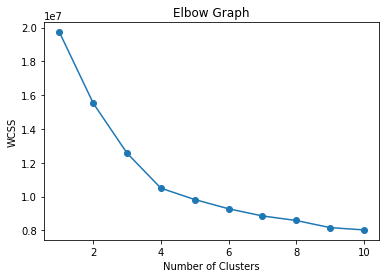

In [59]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets import make_blobs


#modified code found here: https://www.google.com/search?q=how+to+use+elbow+method+in+pandas+to+find+kmeans+in+a+large+dataset&sca_esv=6ce0cdcc7f2b4c2a&ei=8xcxZ6rsEKbHp84P5_jHgAY&ved=0ahUKEwjqsc_dzdKJAxWm48kDHWf8EWAQ4dUDCBA&uact=5&oq=how+to+use+elbow+method+in+pandas+to+find+kmeans+in+a+large+dataset&gs_lp=Egxnd3Mtd2l6LXNlcnAiQ2hvdyB0byB1c2UgZWxib3cgbWV0aG9kIGluIHBhbmRhcyB0byBmaW5kIGttZWFucyBpbiBhIGxhcmdlIGRhdGFzZXRI5xxQ9ghYkRtwAXgBkAEAmAGTAaABshCqAQQ1LjE0uAEDyAEA-AEBmAINoAK-C8ICChAAGLADGNYEGEfCAgUQIRigAcICBRAhGKsCwgIFECEYnwWYAwCIBgGQBgiSBwQxLjEyoAfFTw&sclient=gws-wiz-serp
WCSS = []
for k in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(cgds_pca)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the Elbow Method, I will be using 4 clusters.

Text(0,0.5,'Average Distance From Centroid')

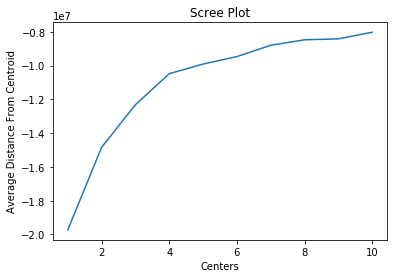

In [60]:
 # compute the average within-cluster distances.
    
scores = []
for center in range(1,11):
    kmeans = MiniBatchKMeans(center)
    
    model = kmeans.fit(cgds_pca)
    scores.append(model.score(cgds_pca))
    
centers = list(range(1,11))
plt.plot(centers, scores)
plt.title('Scree Plot')
plt.xlabel('Centers')
plt.ylabel('Average Distance From Centroid')

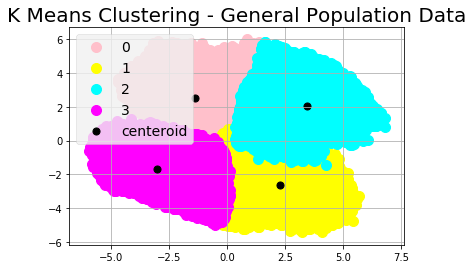

In [61]:
# Re-fit the k-means model with the selected number of clusters and obtain 
# cluster predictions for the general population demographics data.
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(cgds_pca)
y_gen_kmeans = kmeans.predict(cgds_pca)


#modified code found here: https://medium.com/analytics-vidhya/clustering-analysis-of-mall-customer-bd785577f1b0
plt.scatter(cgds_pca[y_gen_kmeans == 0, 0], cgds_pca[y_gen_kmeans == 0, 1], s = 100, c = 'pink', label = '0')
plt.scatter(cgds_pca[y_gen_kmeans == 1, 0], cgds_pca[y_gen_kmeans == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(cgds_pca[y_gen_kmeans == 2, 0], cgds_pca[y_gen_kmeans == 2, 1], s = 100, c = 'cyan', label = '2')
plt.scatter(cgds_pca[y_gen_kmeans == 3, 0], cgds_pca[y_gen_kmeans == 3, 1], s = 100, c = 'magenta', label = '3')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering - General Population Data', fontsize = 20)

plt.legend()
plt.grid()
plt.show()

### Discussion 3.1: Apply Clustering to General Population


This was a bit of a frusterating step.  Trying different cluster sizes would not work for me, even with using a sample size of my data as well as using MiniBatchKMeans.  Simply using the Elbow Method worked to find the ideal number of clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

Anytime I put the next cell into the cleaning function it crashed.  When I pulled it out, it worked.

I did the cleaning on the customer demographics in the cleaning section above as I could not get the information into a function without it crashing.

In [62]:
#Feature Scaling on customer demographics data 




new_customer_dems_scaled_array = scaler.transform(clean_cust_dems)

new_customer_dems_scaled = pd.DataFrame(new_customer_dems_scaled_array, columns=data.columns)

new_customer_dems_scaled.head()



,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,LP_LEBENSPHASE_FEIN,LP_FAMILIE_FEIN,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ZABEOTYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,WOHNDAUER_2008,GEBAEUDETYP,BALLRAUM,INNENSTADT,Missing_data_rows
0,1.179143,-1.033546,0.995461,1.399447,-1.13876,1.119848,-1.237236,-0.434273,-0.791322,-0.905896,-0.970119,0.303276,-0.491745,1.091978,0.935581,0.471844,-1.026259,1.10481,0.886776,1.282972,-0.883588,-0.072949,-1.732890,-0.871886,-1.937737,-1.745662,-1.158329,-1.553663,-0.267857,0.181222,-2.208731,0.550951,-0.676240,-0.532430,-0.274023,-0.342962
1,1.179143,0.967543,-0.966803,1.399447,-1.13876,1.119848,-1.237236,1.013664,0.643209,-0.905896,-1.251416,-0.267921,-0.744872,1.091978,-1.117833,-1.091684,-1.558389,-0.44910,-0.676942,1.282972,1.317492,-1.594510,-1.129629,1.404272,0.235224,0.916198,-0.081643,-1.553663,-0.267857,-0.701848,-2.208731,0.550951,1.948394,1.299666,-1.752983,-0.342962
2,0.206235,-1.033546,1.649549,-0.069009,-1.13876,0.397563,0.827242,1.737633,-0.791322,-0.905896,-1.532712,1.200871,1.533273,1.091978,-0.091126,0.471844,0.038001,1.10481,0.365537,0.806144,-0.333318,0.434238,0.680153,-0.871886,0.235224,-1.213290,0.456700,0.137393,-1.682275,1.947362,1.022067,0.550951,0.073656,-0.532430,-0.274023,-0.342962
3,0.206235,-1.033546,0.341373,1.399447,-1.13876,1.119848,-1.237236,-0.434273,-0.074056,0.541221,0.998955,0.058477,-0.491745,-0.285119,0.935581,-0.049332,0.038001,-1.48504,1.408015,0.806144,-0.333318,0.941425,-1.129629,0.266193,0.235224,-0.680918,-0.619986,0.137393,-0.975066,0.181222,-2.208731,0.550951,-0.676240,1.299666,1.697925,-0.342962
4,1.179143,-1.033546,-0.966803,1.399447,-1.13876,1.119848,-1.237236,-1.158242,-0.791322,-0.905896,0.717659,0.303276,-0.491745,1.091978,-0.091126,-1.091684,0.570131,-1.48504,0.886776,0.329317,-0.883588,-0.072949,-0.526369,-0.871886,-1.937737,-1.213290,-1.158329,0.137393,-1.682275,0.181222,-1.562571,0.550951,-0.676240,0.841642,0.218964,-0.342962


In [63]:
#PCA Steps on customer demographics data 


ncds_pca = pca.transform(new_customer_dems_scaled)

In [64]:
ncds_pca 

array([[-2.37563821,  4.45034134, -0.10491503, ..., -0.31983005,
         0.26264117, -0.65376318],
       [-4.4617716 , -1.41575097, -0.37325694, ..., -0.49817647,
         1.93861751,  1.60551222],
       [ 0.84800643,  1.67480981,  2.22775022, ..., -0.11749483,
         1.20715509, -0.65710311],
       ...,
       [-4.19506853,  2.98972168,  2.18795439, ...,  0.04731623,
        -0.52809535, -0.2023087 ],
       [-2.67575274, -1.98804631,  1.29335097, ...,  0.67237155,
        -0.37171803,  0.07221496],
       [ 0.95389319,  3.67043443,  2.11270191, ..., -1.01068806,
         0.09259034, -0.02341184]])

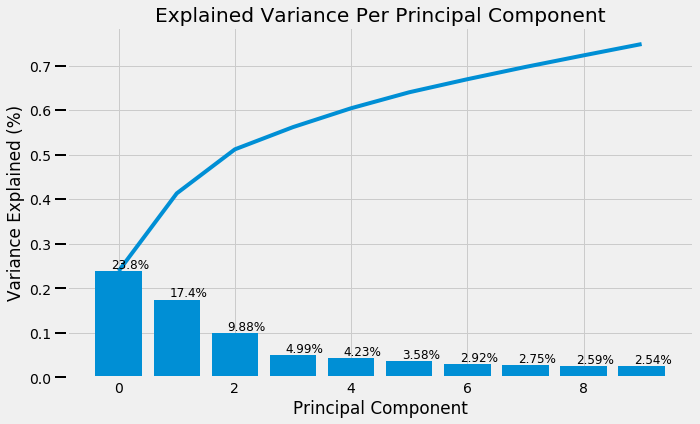

In [65]:
scree_plot(pca)

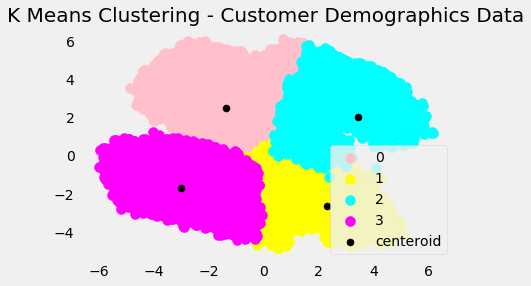

In [67]:
# cluster predictions for the customer population demographics data.

y_cust_kmeans = kmeans.predict(ncds_pca)


#modified code found here: https://medium.com/analytics-vidhya/clustering-analysis-of-mall-customer-bd785577f1b0
plt.scatter(ncds_pca[y_cust_kmeans == 0, 0], ncds_pca[y_cust_kmeans == 0, 1], s = 100, c = 'pink', label = '0')
plt.scatter(ncds_pca[y_cust_kmeans == 1, 0], ncds_pca[y_cust_kmeans == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(ncds_pca[y_cust_kmeans == 2, 0], ncds_pca[y_cust_kmeans == 2, 1], s = 100, c = 'cyan', label = '2')
plt.scatter(ncds_pca[y_cust_kmeans == 3, 0], ncds_pca[y_cust_kmeans == 3, 1], s = 100, c = 'magenta', label = '3')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering - Customer Demographics Data', fontsize = 20)

plt.legend()
plt.grid()
plt.show()

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

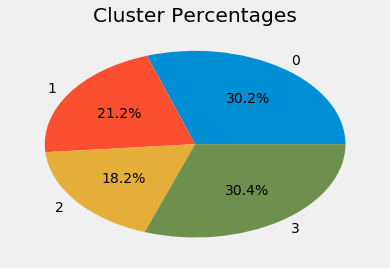

In [68]:
#Percentages of General Demographics Data
unique_labels, counts = np.unique(y_gen_kmeans, return_counts=True)
percentages = counts / counts.sum() * 100

plt.pie(percentages, labels=unique_labels, autopct='%1.1f%%')
plt.title('Cluster Percentages')
plt.show()

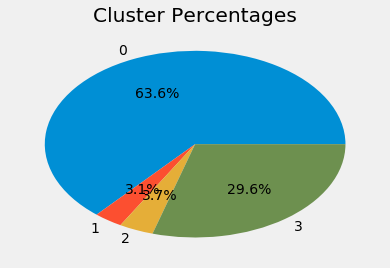

In [69]:
#Percentages of Customer Demographics Data
unique_labels, counts = np.unique(y_cust_kmeans, return_counts=True)
percentages = counts / counts.sum() * 100

plt.pie(percentages, labels=unique_labels, autopct='%1.1f%%')
plt.title('Cluster Percentages')
plt.show()

I will focus on Cluster 0 - which has an overrepresented % of Customer Data vs General Data.

In [70]:
#To compare data for cluster 0 I removed PCA and Scaling on each dataset:

#removing PCA on general data
gen_data=pca.inverse_transform(cgds_pca)

#removing scaling on general data
gen_data_unscaled=scaler.inverse_transform(gen_data)

#converting back to dataframe
gen_data_df=pd.DataFrame(gen_data_unscaled, columns=data.columns)



In [71]:
#removing PCA on customer data
cust_data=pca.inverse_transform(ncds_pca)

#removing scaling on customer data
cust_data_unscaled=scaler.inverse_transform(cust_data)

#converting back to dataframe
cust_data_df=pd.DataFrame(cust_data_unscaled, columns=data.columns)

Focusing on the top 3 and bottom 3 of the 2 cluster:

Top 3:

 - SEMIO_REL
 - FINANZ_SPARER
 - SEMIO_PFLICHT
 
Bottom 3: 
 - SEMIO_ERL
 - FINANZ_VORSORGER
 - ALTERSKATEGORIE_GROB


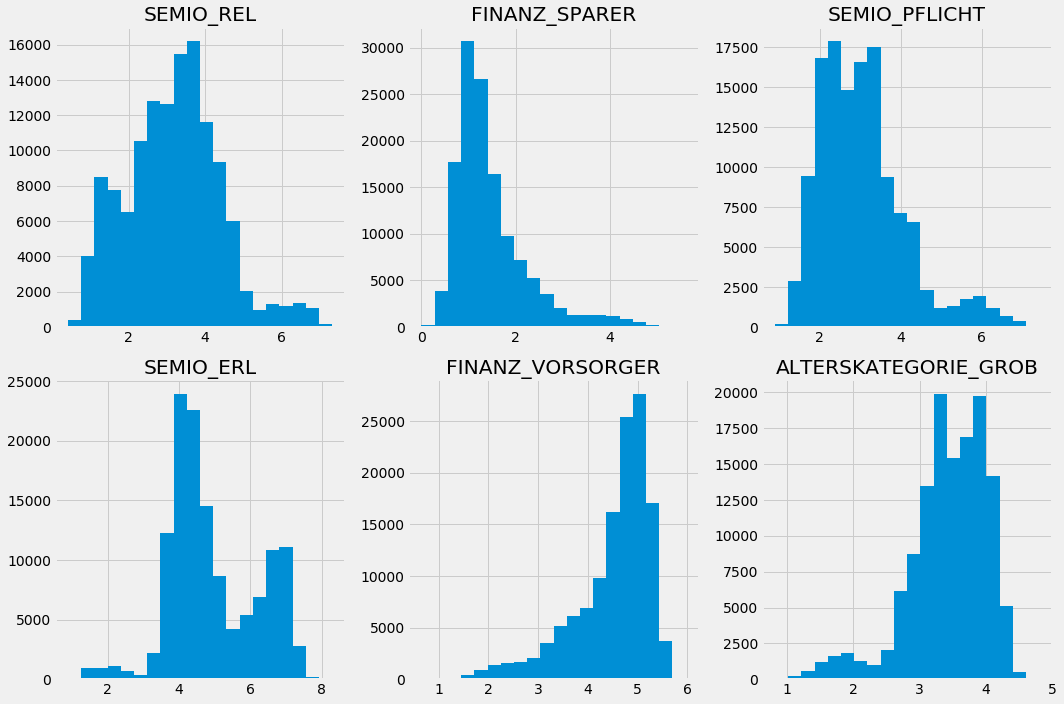

In [72]:
#modified code found here: https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions

features = ['SEMIO_REL', 'FINANZ_SPARER', 'SEMIO_PFLICHT', 'SEMIO_ERL', 'FINANZ_VORSORGER', 'ALTERSKATEGORIE_GROB']


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(cust_data_df[feature], bins=20)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

Representation of people in Cluster 2:

 - SEMIO_REL: (Religious Affinity): average affinity
 - FINANZ_SPARER: (money-saver): very high
 - SEMIO_PFLICHT: (dutiful): high to very high affinity
 - SEMIO_ERL: (event-oriented): average affinity
 - FINANZ_VORSORGER: (be prepared): very low affinity
 - ALTERSKATEGORIE_GROB: (Estimated age based on given name analysis): 46-60 years old and over 60.



### Discussion 3.3: Compare Customer Data to Demographics Data

The company's customer base is not universal as the general demographics clusters are very balanced around each centeroid, whereas the customer demographics is not.

Cluster 0 is overrepresented in the customer data as compared to demographics data. There is a higher percent in the customer demographics than the general demographics suggesting people in this cluster would be a target for the company.  

Based on this analysis, I would urge the company to focus on older, event-oriented people with a religious affinity and a tendency to be dutiful and save their money.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.